21 / Septiembre / 2023

# **Predicción del precio del dólar al próximo día con regresión lineal**

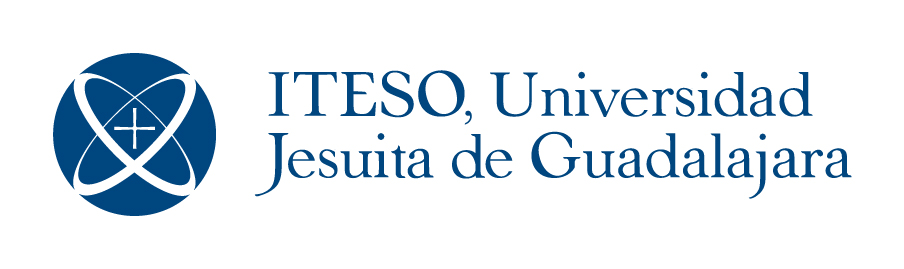

## **Integrantes del Equipo**
- Diego Lozoya Morales / diego.lozoya@iteso.mx / 745345
- Luis Eduardo Jiménez del Muro / eduardo.jimenez@iteso.mx / 746484
- Ivanna Herrera Ibarra / ivanna.herrera@iteso.mx / 744614

## **Objetivo general**
Predecir el precio del dólar al día siguiente mediante regresión lineal y un ajuste de curvas.

## **Objetivos específicos a alcanzar**
- Descargar una base de datos con los precios de cierre del dolar del último año.
- Con la base de datos ajustar polinomios de grado 1, 3 y 5.
- Comparar los resultados obtenidos de la predicción con el precio publicado.
Tomar un rango predeterminado, con el cual crear un modelo para extrapolar los resultados y comparar con los verdaderos precios cotizados.
- Comparar los diferentes polinomios usados, para determinar cual es el que mejor se ajusta a los verdaderos precios.

## **Modelo que representa el problema**
- Polinomio de grado 1: $a + bx$

- Polinomio de grado 3: $a + bx + cx^2 + dx^3$

- Polinomio de grado 5: $a + bx + cx^2 + dx^3 + ex^4 + fx^5$

- $a, b, c ,d ,e, f$ = factores constantes de la variable $x$ del polinomio

Decidimos usar los polinomios anteriores para comparar la precisión del ajuste del polinomio con los puntos de la base de datos de precios. Posteriormente comparar los resultados obtenidos de la predicción conforme vayamos aumentando el grado de los mismos con el precio publicado.

La limitación que tienen estos modelos es que únicamente estan tomando una muestra de un pequeño periodo de datos, por lo que no prodrán simular a la perfección el verdadero comportamiento.

## **Solución**
De la página de FactSet descargamos los datos del último año (desde el 19 de Septiembre del 2022 hasta el 19 de Septiembre del 2023) de la cotización de pesos mexicanos por dólares estadounidenses a una tabla en excel.

In [ ]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/Colab Notebooks/Simulación matemática/Optimización/Proyecto/'
data = pd.read_excel(data_path + 'PriceHistory.xlsx')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Fecha,Día,Representación,MXN/USD
0,2022-09-19,0,0.00,19.99700
1,2022-09-20,1,0.01,19.97400
2,2022-09-21,2,0.02,20.00550
3,2022-09-22,3,0.03,19.97550
4,2022-09-23,4,0.04,20.15550
...,...,...,...,...
257,2023-09-13,257,2.57,17.09650
258,2023-09-14,258,2.58,17.12750
259,2023-09-15,259,2.59,17.10200
260,2023-09-18,260,2.60,17.15725


Decidimos utilizar todos los datos exceptuando el primero y el último, de modo que podamos extrapolar el modelo, para el cálculo de estos 2 datos y comparar con los verdaderos precios cotizados.

Ya que son 261 datos, tuvimos que dividir el número de días entre 100, para no tener números tan grandes y poder resolver el problema sin errores al momento de elevar al grado 3 y 5

In [ ]:
inicio = 1
fin = 261

m = len(data)-2
x = data["Representación"].to_numpy()[inicio:fin]
y = data["MXN/USD"].to_numpy()[inicio:fin]

def funcion_de_costo(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

#lineal = b0 + b1*x
beta = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
y_vector = np.reshape(y, [m, 1])
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

#cuadrática = b0 + b1*x + b2*x**2
beta = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack( (ones, x_factor, x2_factor) )
sol2 = opt.minimize(funcion_de_costo, beta, args=(X2, y_vector))

#cúbica = b0 + b1*x + b2*x**2 + b3*x**3
beta = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )
sol3 = opt.minimize(funcion_de_costo, beta, args=(X3, y_vector))

#cuarta = b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4
beta = np.random.rand(5)
x4_factor = np.reshape(x**4, [m, 1])
X4 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor) )
sol4 = opt.minimize(funcion_de_costo, beta, args=(X4, y_vector))

#quinta = b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4 + b5*x**5
beta = np.random.rand(6)
x5_factor = np.reshape(x**5, [m, 1])
X5 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor, x5_factor) )
sol5 = opt.minimize(funcion_de_costo, beta, args=(X5, y_vector))

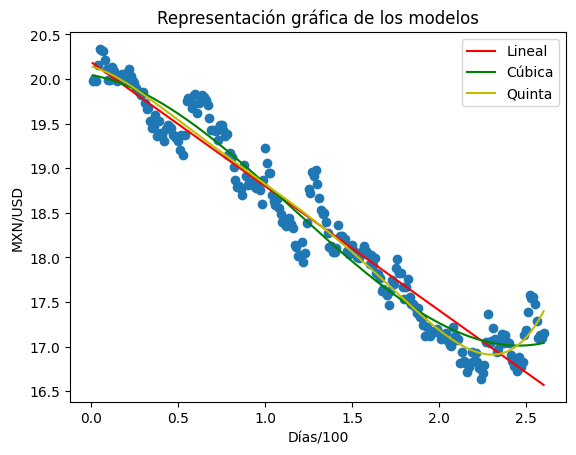

In [ ]:
def f1(x):
    return sol1.x[0] + sol1.x[1]*x

def f3(x):
    return sol3.x[0] + sol3.x[1]*x + sol3.x[2]*x**2 + sol3.x[3]*x**3

def f5(x):
    return sol5.x[0] + sol5.x[1]*x + sol5.x[2]*x**2 + sol5.x[3]*x**3 + sol5.x[4]*x**4 + sol5.x[5]*x**5

plt.figure()
plt.scatter(x, y)
plt.title("Representación gráfica de los modelos")
plt.xlabel("Días/100")
plt.ylabel("MXN/USD")
plt.plot(x, f1(x), "r", label = "Lineal")
plt.plot(x, f3(x), "g", label = "Cúbica")
plt.plot(x, f5(x), "y", label = "Quinta")
plt.legend(loc = "best")

Adémas graficamos el error cuádrico de los diferentes polinomios para ver gráficamente cual es el que mejor se ajusta

<BarContainer object of 3 artists>

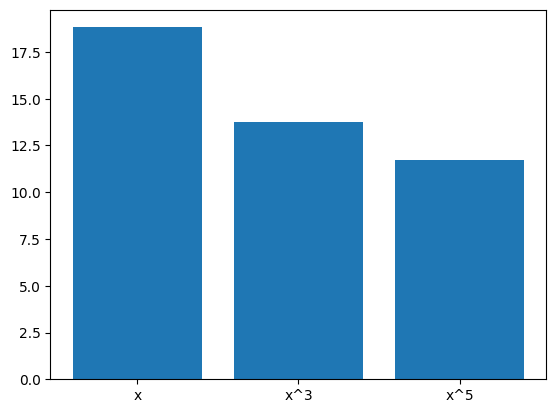

In [ ]:
x_label = [1, 2, 3]
y_label = [sol1.fun, sol3.fun, sol5.fun]
etiquetas = ["x", "x^3", "x^5"]

fig, ax = plt.subplots()
ax.bar(x = x_label, height = y_label, tick_label = etiquetas)

## **Resultados**

### **Modelo polinomio grado 1**

La función del polinomio de grado 1 es: $f(x) = 20.19174408 - 1.39247268x$



La estimación para el precio del dólar el día 19 de Septiembre de 2022 es de:

In [ ]:
f1(0.00)

20.19174408049524

La estimación para el precio del dólar el día 19 de Septiembre de 2023 es de:

In [ ]:
f1(2.61)

16.557390387831187

### **Modelo polinomio grado 3**

La función del polinomio de grado 3 es: $f(x) = 20.04463718 - 0.33667878x - 1.23295761x^2 + 0.3531294x^3$

La estimación para el precio del dólar el día 19 de Septiembre de 2022 es de:

In [ ]:
f3(0.00)

20.04463718159196

La estimación para el precio del dólar el día 19 de Septiembre de 2023 es de:

In [ ]:
f3(2.61)

17.04536788664844

### **Modelo polinomio grado 5**

La función del polinomio de grado 5 es: $f(x) = 20.14131287 - 0.52762892x - 2.4577805x^2 + 2.93404377x^3 - 1.55927027x^4 + 0.29397744x^5$

La estimación para el precio del dólar el día 19 de Septiembre de 2022 es de:

In [ ]:
f5(0.00)

20.141312874532435

La estimación para el precio del dólar el día 19 de Septiembre de 2023 es de:

In [ ]:
f5(2.61)

17.435599355094432

---

El precio cotizado el día 19 de Septiembre de 2022 fue de \$19.99700 MXN/USD

El precio cotizado el día 19 de Septiembre de 2023 fue de \$17.09050 MXN/USD

## **Conclusiónes**
Según la gráfica de error que realizamos, el polinomio con menos error de ajuste a los datos es el de grado número 5. A pesar de que el polinomio con menos error es el de grado número 5, la predicción que mas se acerca a los datos publicados es la de grado número 3. La predicción no es 100% acertada, ya que hay factores, como el riesgo, que no tomamos en cuenta para realizar estos modelos; solamente estamos tomando una representación, por lo que más que predecir, nos ayuda a determinar tendencia; una regresión lineal se ajusta con datos obtenidos, por lo que extrapolar representa un pronóstico de lo que podría llegar a suceder.



## **Referencias**
FactSet Global Equity Research. (2023). Mexican Peso per U.S. Dollar (USDMXN). FactSet.